# Mean Reversion Strategies

### Define a threshold for the distance between the current stock price and the SMA, which signals a long/short position.

In [2]:
import pandas as pd
import numpy as np
raw = pd.read_csv('../data/pyalgo_eikon_eod_data.csv',
                 index_col=0, parse_dates=True).dropna()

In [4]:
data = pd.DataFrame(raw['GDX'])
data.rename(columns={'GDX': 'price'}, inplace=True)
data.head()

,price
Date,
2010-01-04,47.71
2010-01-05,48.17
2010-01-06,49.34
2010-01-07,49.10
2010-01-08,49.84


In [5]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))

In [7]:
SMA = 25
data['SMA'] = data['price'].rolling(SMA).mean()
threshold = 3.5
data['distance'] = data['price'] - data['SMA']

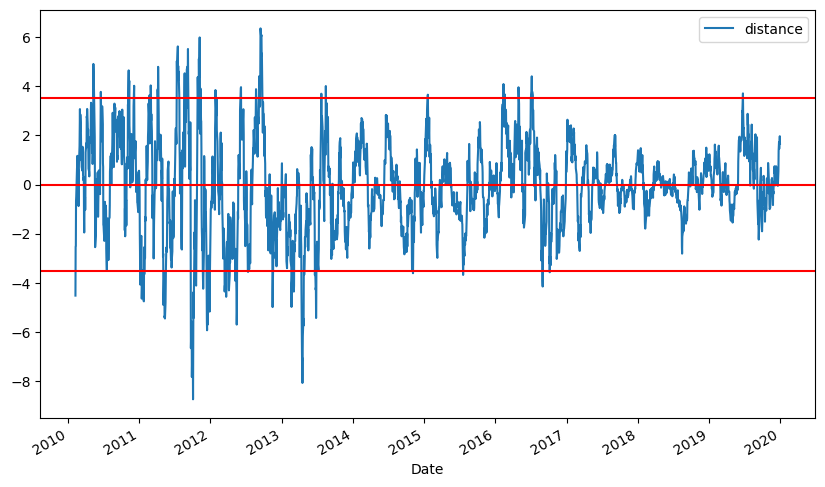

In [13]:
%matplotlib inline
from pylab import mpl, plt
data['distance'].dropna().plot(figsize=(10, 6), legend=True)
plt.axhline(threshold, color='r')
plt.axhline(-threshold, color='r')
plt.axhline(0, color='r');

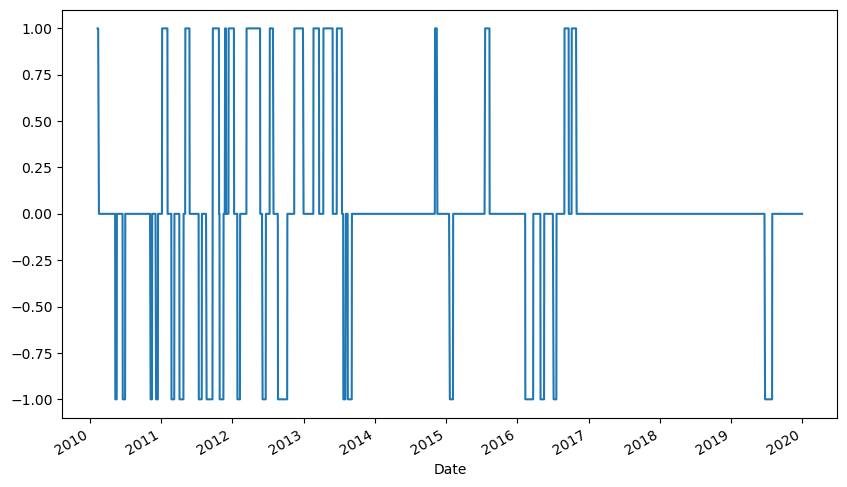

In [22]:
data['position'] = np.where(data['distance'] > threshold, -1, np.nan)
data['position'] = np.where(data['distance'] < -threshold, 1, data['position'])
# If there is market change that crosses the SMA, set the postion at 0.
data['position'] = np.where(data['distance'] * data['distance'].shift(1) < 0, 0, data['position'])
data['position'] = data['position'].ffill().fillna(0)
data['position'].iloc[SMA:].plot(ylim=[-1.1, 1.1],
                                 figsize=(10, 6));

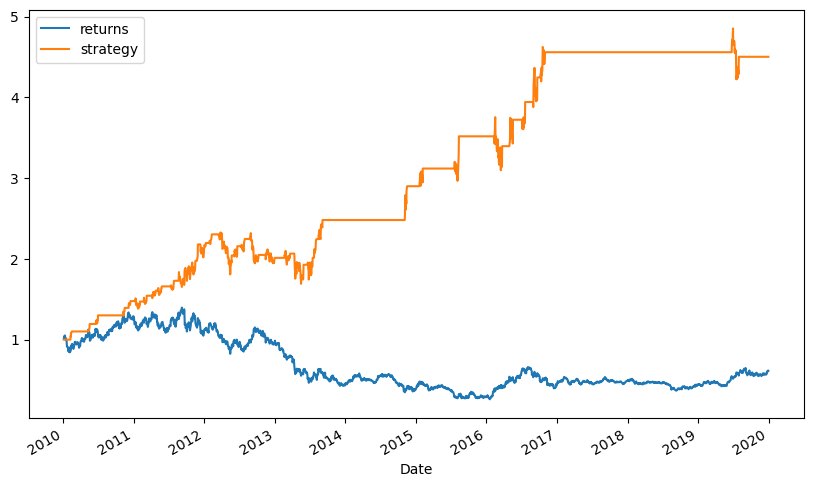

In [23]:
data['strategy'] = data['position'].shift(1) * data['returns']
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));